## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)

**Answer:** In Q1 pdf

3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('./gss_religion_happiness.csv')

# FIXED: Recode religion - treat missing as "None"
def recode_religion(relig):
    if pd.isna(relig):
        return 'None'
    relig_str = str(relig).lower()
    if 'catholic' in relig_str:
        return 'Catholic'
    else:
        return 'Other'

df['relig_group'] = df['relig'].apply(recode_religion)

# Clean happiness
def clean_happy(happy):
    if pd.isna(happy):
        return np.nan
    happy_str = str(happy).lower()
    if 'very happy' in happy_str:
        return 'Very happy'
    elif 'pretty happy' in happy_str:
        return 'Pretty happy'
    elif 'not too happy' in happy_str:
        return 'Not too happy'
    else:
        return np.nan

df['happy_clean'] = df['happy'].apply(clean_happy)
happy_map = {'Very happy': 3, 'Pretty happy': 2, 'Not too happy': 1}
df['happy_numeric'] = df['happy_clean'].map(happy_map)

# Clean age- convert to numeric
df['age_numeric'] = pd.to_numeric(df['age'], errors='coerce')

# Drop rows missing happiness
df_clean = df.dropna(subset=['happy_clean'])

# Catholic vs None
df_analysis = df_clean[df_clean['relig_group'].isin(['Catholic', 'None'])].copy()

print(f"Catholic vs None: {df_analysis.shape[0]} rows")
print(df_analysis['relig_group'].value_counts())

Catholic vs None: 26834 rows
relig_group
Catholic    16770
None        10064
Name: count, dtype: int64


4. Produce some numeric summaries and visualizations. (1-3 pages)

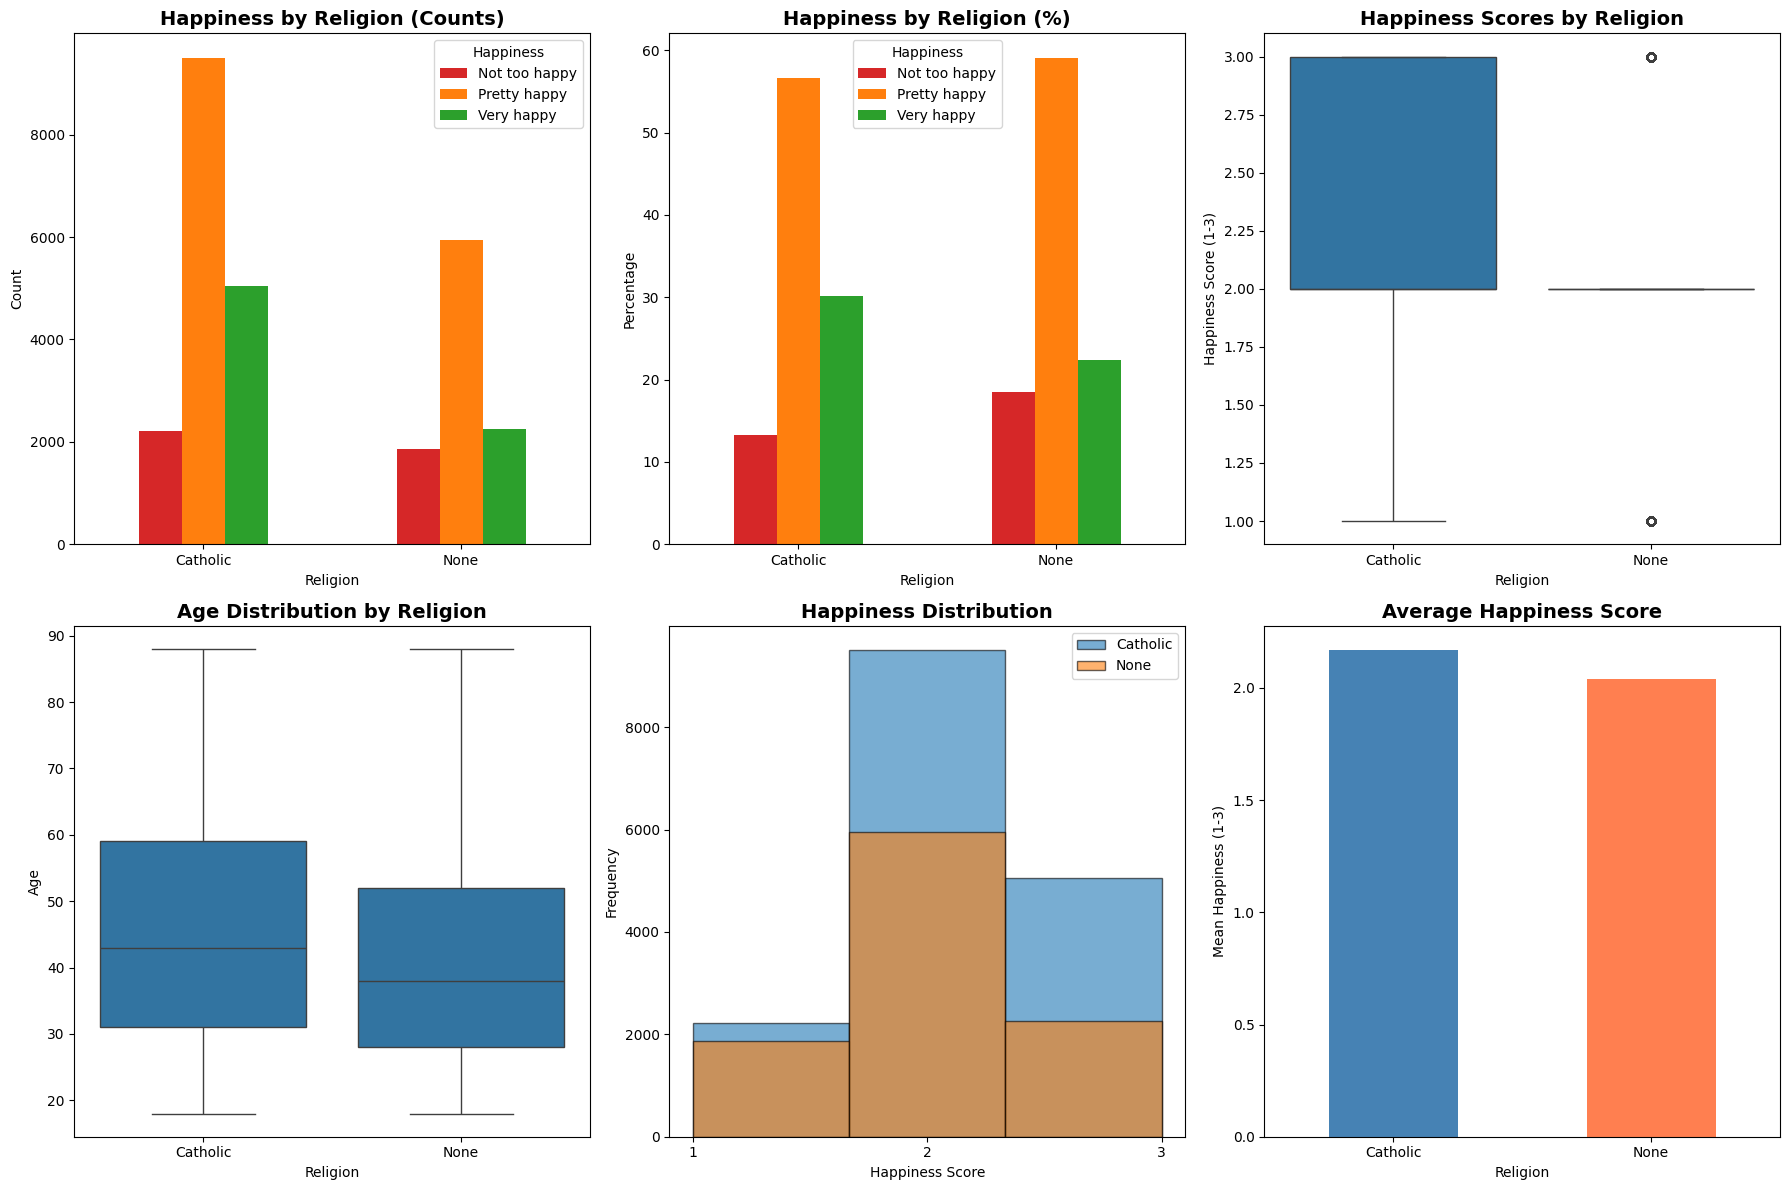


Happiness by Religion (%):
happy_clean  Not too happy  Pretty happy  Very happy
relig_group                                         
Catholic             13.24         56.67       30.09
None                 18.49         59.09       22.42

Mean Happiness Score:
                 mean       std  count
relig_group                           
Catholic     2.168456  0.636381  16770
None         2.039249  0.638421  10064

Age Statistics:
               count       mean        std   min   25%   50%   75%   max
relig_group                                                             
Catholic     16526.0  45.758925  17.320989  18.0  31.0  43.0  59.0  88.0
None          9872.0  41.063716  15.864150  18.0  28.0  38.0  52.0  88.0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Happiness by religion (Counts)
ax1 = axes[0, 0]
happy_counts = pd.crosstab(df_analysis['relig_group'], df_analysis['happy_clean'])
happy_counts.plot(kind='bar', ax=ax1, color=['#d62728', '#ff7f0e', '#2ca02c'])
ax1.set_title('Happiness by Religion (Counts)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Religion')
ax1.set_ylabel('Count')
ax1.legend(title='Happiness')
ax1.tick_params(axis='x', rotation=0)

# 2. Happiness (Percentages)
ax2 = axes[0, 1]
happy_pct = pd.crosstab(df_analysis['relig_group'], df_analysis['happy_clean'], normalize='index') * 100
happy_pct.plot(kind='bar', ax=ax2, color=['#d62728', '#ff7f0e', '#2ca02c'])
ax2.set_title('Happiness by Religion (%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Religion')
ax2.set_ylabel('Percentage')
ax2.legend(title='Happiness')
ax2.tick_params(axis='x', rotation=0)

# 3. Happiness scores boxplot
ax3 = axes[0, 2]
sns.boxplot(data=df_analysis, x='relig_group', y='happy_numeric', ax=ax3)
ax3.set_title('Happiness Scores by Religion', fontsize=14, fontweight='bold')
ax3.set_xlabel('Religion')
ax3.set_ylabel('Happiness Score (1-3)')

# 4. Age distribution
ax4 = axes[1, 0]
sns.boxplot(data=df_analysis, x='relig_group', y='age_numeric', ax=ax4)
ax4.set_title('Age Distribution by Religion', fontsize=14, fontweight='bold')
ax4.set_xlabel('Religion')
ax4.set_ylabel('Age')

# 5. Histogram of happiness
ax5 = axes[1, 1]
for relig in ['Catholic', 'None']:
    data = df_analysis[df_analysis['relig_group'] == relig]['happy_numeric'].dropna()
    ax5.hist(data, alpha=0.6, label=relig, bins=3, edgecolor='black')
ax5.set_title('Happiness Distribution', fontsize=14, fontweight='bold')
ax5.set_xlabel('Happiness Score')
ax5.set_ylabel('Frequency')
ax5.legend()
ax5.set_xticks([1, 2, 3])

# 6. Mean happiness
ax6 = axes[1, 2]
mean_happy = df_analysis.groupby('relig_group')['happy_numeric'].mean()
mean_happy.plot(kind='bar', ax=ax6, color=['steelblue', 'coral'])
ax6.set_title('Average Happiness Score', fontsize=14, fontweight='bold')
ax6.set_xlabel('Religion')
ax6.set_ylabel('Mean Happiness (1-3)')
ax6.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# numerical summaries

print("\nHappiness by Religion (%):")
print(happy_pct.round(2))

print("\nMean Happiness Score:")
print(df_analysis.groupby('relig_group')['happy_numeric'].agg(['mean', 'std', 'count']))

print("\nAge Statistics:")
print(df_analysis.groupby('relig_group')['age_numeric'].describe())

# Save
df_analysis.to_csv('gss_catholic_vs_none.csv', index=False)

5. Describe your findings in 1-2 pages.

**Answer:** In Q5 pdf

6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

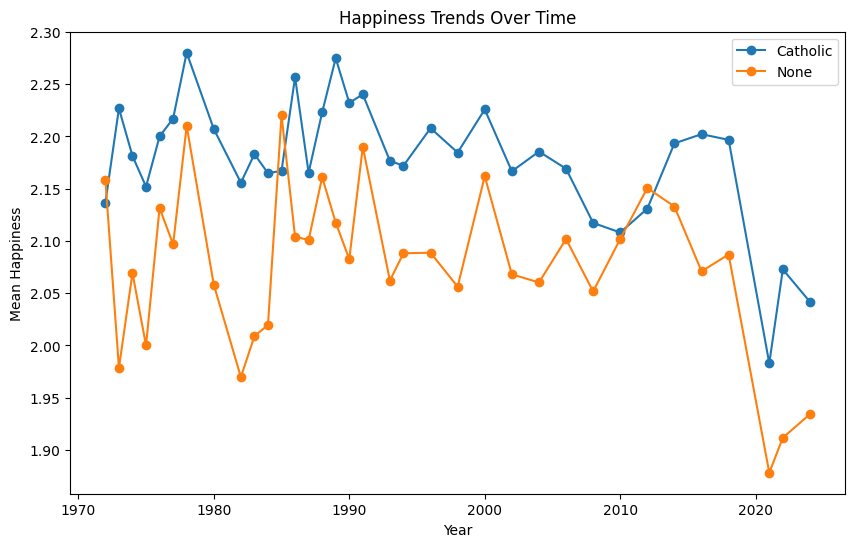

In [18]:
# SOME EXTRA POTENTIAL DATA:

# Happiness by religion over years
happiness_trend = df_analysis.groupby(['year', 'relig_group'])['happy_numeric'].mean().reset_index()

plt.figure(figsize=(10, 6))
for relig in ['Catholic', 'None']:
    data = happiness_trend[happiness_trend['relig_group'] == relig]
    plt.plot(data['year'], data['happy_numeric'], label=relig, marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Happiness')
plt.title('Happiness Trends Over Time')
plt.legend()
plt.show()